# Initialize and find the ImageDataSet ids for the genes of interest

In [1]:
import requests
import json

#Best section for cm from the Met coronal dataset
#http://mouse.brain-map.org/experiment/siv?id=79591401&imageId=79603932&initImage=ish&coordSystem=pixel&x=4804&y=2733&z=5
    



In [2]:
def getGeneID(gene):
    section_orientation='coronal'
    urlString=''.join(['http://api.brain-map.org/api/v2/data/',
            'query.json?criteria=model::SectionDataSet,',
            'rma::criteria,',
            "[failed$eq'false'],",
            "products[abbreviation$eq'Mouse'],",
            "plane_of_section[name$eq'",
            section_orientation,
            "'],",
            "genes[acronym$eq'",
            gene,
            "']"])
    response = requests.get(urlString)
    rJson=response.json()
    msg=rJson['msg']
    if not msg:
        id=0;
    else:
        id=rJson['msg'][0]['id'];
    return id

In [12]:
genes=['Met', 'Utrn', 'Calcr', 'Unc5c', 'Nr2f2', 'Elmo1', 'Pcp4l1', 'Pde4b', 'Chrm2', 'Cbln2', 'Tacr3', 'Galnt18', 'Wscd1','Rxfp1']
#genes=['Arhgap36','Asb4','Hs3st4'  ,'Prkcq','St8sia2','Trh','Igsf1','Pax5','Prmt8','Prph','Fam19a2','Clic1','Fstl5','Adra2a','Slc6a1','Tmem176b']
#genes=['Adora2a', 'Tph2', 'Slc17a7']
section_orientation='coronal'

imageDataSet_ids={}
imageDataSet_ids_str=[]

for gene in genes:
    imageDataSet_ids[gene]=getGeneID(gene)
    imageDataSet_ids_str=imageDataSet_ids_str+[str(imageDataSet_ids[gene])]
    

{'Calcr': 75080999,
 'Cbln2': 70231306,
 'Chrm2': 70560343,
 'Elmo1': 70743907,
 'Galnt18': 70928328,
 'Met': 79591401,
 'Nr2f2': 112646890,
 'Pcp4l1': 75084520,
 'Pde4b': 2472,
 'Rxfp1': 70562124,
 'Tacr3': 1297,
 'Unc5c': 71670708,
 'Utrn': 73929872,
 'Wscd1': 71920517}

# Get the reference image and plot it

In [4]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def getImage(image_id, downSample, display, allChan):
    urlString=''.join(["http://api.brain-map.org/api/v2/image_download/",
                                    str(image_id),
                                    "?",
                         #           "view=expression&",
                                     "downsample=",
                                     str(downSample)])
    print(urlString)
    response = requests.get(urlString)

    response.raise_for_status()
    with io.BytesIO(response.content) as f:
        with Image.open(f) as img:
            newImage=np.array(img)
    if allChan==False:
        newImage=newImage[:,:,0]
    if (display==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        if allChan==False:
            ax.imshow(newImage, cmap='gray')
        else:
            ax.imshow(newImage)            
        plt.show()        
        
    return newImage

http://api.brain-map.org/api/v2/image_download/79603932?downsample=1


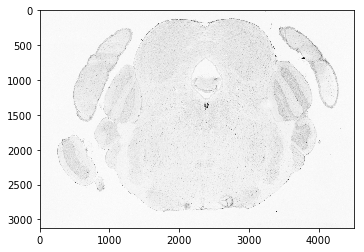

In [5]:
zeroImage_id=79603932
zeroDataSet_id=79591401

downSample=1;
zeroImage=getImage(zeroImage_id, downSample, 1, False)


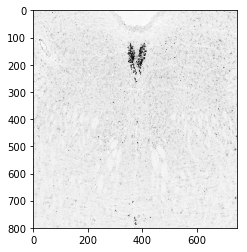

In [7]:
from skimage import dtype_limits
plt_img = zeroImage[1200:2000,2000:2750]
#img = dtype_limits(plt_img)[1] - plt_img
img=plt_img
img.shape
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img, cmap='gray')
plt.show()    

## pick the corners

In [9]:
zeroImageSize=zeroImage.shape
#xC=round(zeroImageSize[1]/2)
#yC=round(zeroImageSize[0]/2)
xC=2375
yC=1600
xC_raw=xC*(downSample+1)
yC_raw=yC*(downSample+1)

dX=200
dY=400
L=(downSample+1)*(xC-dX)
R=(downSample+1)*(xC+dX)
U=(downSample+1)*(yC-dY)
D=(downSample+1)*(yC+dY)

allX=[L, R, R, L]
allY=[U, U, D, D]


### Try to go straight from each of the image ROI corners to coordinates and slices in all the other data sets

In [14]:
returns=[]

for xy in zip(allX, allY):
    urlString=''.join(["http://api.brain-map.org/api/v2/image_to_image/",
                                    str(zeroImage_id),
                                    ".json?",
                                    "x=",
                                    str(xy[0]),
                                    "&y=",
                                    str(xy[1]), 
                                    "&section_data_set_ids=",
                                    ','.join(imageDataSet_ids_str)
                                    ])        
#    print(urlString)
    response = requests.get(urlString)
    reference_equiv=response.json()
    returns=returns+[reference_equiv]


http://api.brain-map.org/api/v2/image_to_image/79603932.json?x=4350&y=2400&section_data_set_ids=79591401,73929872,75080999,71670708,112646890,70743907,75084520,2472,70560343,70231306,1297,70928328,71920517,70562124
http://api.brain-map.org/api/v2/image_to_image/79603932.json?x=5150&y=2400&section_data_set_ids=79591401,73929872,75080999,71670708,112646890,70743907,75084520,2472,70560343,70231306,1297,70928328,71920517,70562124
http://api.brain-map.org/api/v2/image_to_image/79603932.json?x=5150&y=4000&section_data_set_ids=79591401,73929872,75080999,71670708,112646890,70743907,75084520,2472,70560343,70231306,1297,70928328,71920517,70562124
http://api.brain-map.org/api/v2/image_to_image/79603932.json?x=4350&y=4000&section_data_set_ids=79591401,73929872,75080999,71670708,112646890,70743907,75084520,2472,70560343,70231306,1297,70928328,71920517,70562124


In [15]:
image_id_list=[]
xy_list=[]

for c in range(0,len(returns[0]['msg'])):
    image_id=returns[0]['msg'][c]['image_sync']['section_image_id']
    
    xys=np.zeros((3,4))
    xy_list_this=[]
    
    use=True
    for p in range(0,4):
  #      print(returns[p]['msg'][c]['image_sync']['section_data_set_id'])
        xys[0,p]=returns[p]['msg'][c]['image_sync']['x']
        xys[1,p]=returns[p]['msg'][c]['image_sync']['y']
        xys[2,p]=returns[p]['msg'][c]['image_sync']['section_number']

        if image_id!=returns[p]['msg'][c]['image_sync']['section_image_id']:
            use=False
        xy_list_this
        xy_list_this=xy_list_this+[(round(xys[0,p]), round(xys[1,p]))]

    if use==True:
        image_id_list=image_id_list+[image_id]
        xy_list=xy_list+[xy_list_this]
        print('using')
     #   print(xys)
    else:
        print(image_id, 'does not have slice constancy.  Must be tilted.  Skipping')
    #    print(xys)



using
using
using
using
112647002 does not have slice constancy.  Must be tilted.  Skipping
70611701 does not have slice constancy.  Must be tilted.  Skipping
using
using
using
using
using
using
71755781 does not have slice constancy.  Must be tilted.  Skipping
70469502 does not have slice constancy.  Must be tilted.  Skipping


In [17]:
import numpy as np
from scipy import ndimage
import matplotlib as mpl
import matplotlib.pyplot as plt

def plotWithPoints(p, image_id):
    mpl.rcParams.update({'image.cmap': 'gray',
                         'lines.markersize': 12,
                         'axes.prop_cycle': mpl.cycler('color', ['#00ff00'])})


    gImage=getImage(image_id, downSample, 0, False)

    downsample=1
    plt.imshow(gImage, cmap='gray')
    for xy in p:
        plt.plot(xy[0]/(downsample+1), xy[1]/(downsample+1), '.')
    plt.axis('image')
    plt.show()
    
    


79603932
[(4350.0, 2400.0), (5150.0, 2400.0), (5150.0, 4000.0), (4350.0, 4000.0)]
http://api.brain-map.org/api/v2/image_download/79603932?downsample=1


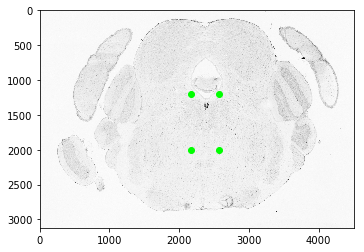

73892839
[(3979.0, 4138.0), (4756.0, 4200.0), (4637.0, 5800.0), (3860.0, 5737.0)]
http://api.brain-map.org/api/v2/image_download/73892839?downsample=1


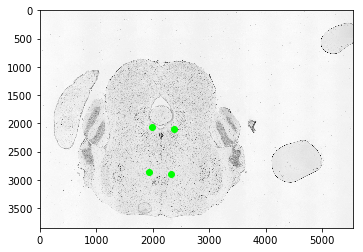

75034495
[(4071.0, 2588.0), (4873.0, 2600.0), (4843.0, 4219.0), (4041.0, 4206.0)]
http://api.brain-map.org/api/v2/image_download/75034495?downsample=1


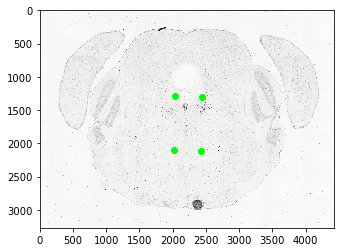

71501901
[(3944.0, 2614.0), (4803.0, 2632.0), (4763.0, 4114.0), (3905.0, 4096.0)]
http://api.brain-map.org/api/v2/image_download/71501901?downsample=1


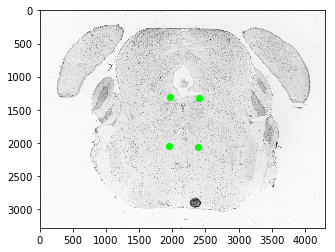

75017436
[(4136.0, 2844.0), (4906.0, 2934.0), (4721.0, 4597.0), (3950.0, 4506.0)]
http://api.brain-map.org/api/v2/image_download/75017436?downsample=1


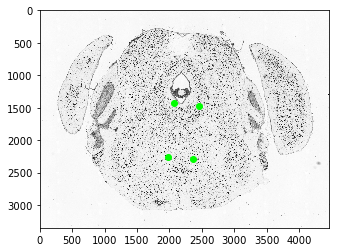

101360522
[(3429.0, 2307.0), (3917.0, 2353.0), (3842.0, 3459.0), (3353.0, 3414.0)]
http://api.brain-map.org/api/v2/image_download/101360522?downsample=1


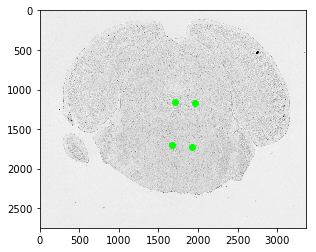

70383547
[(3070.0, 2706.0), (3919.0, 2769.0), (3796.0, 4414.0), (2947.0, 4351.0)]
http://api.brain-map.org/api/v2/image_download/70383547?downsample=1


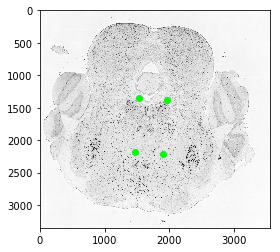

69908605
[(3522.0, 2648.0), (4372.0, 2644.0), (4379.0, 4226.0), (3529.0, 4231.0)]
http://api.brain-map.org/api/v2/image_download/69908605?downsample=1


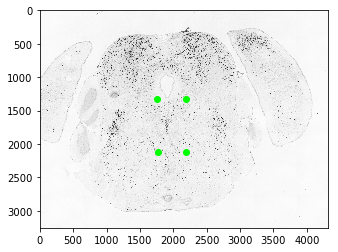

101354544
[(2147.0, 1906.0), (2701.0, 1947.0), (2624.0, 3134.0), (2071.0, 3093.0)]
http://api.brain-map.org/api/v2/image_download/101354544?downsample=1


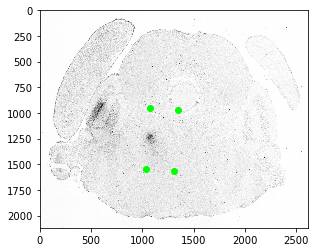

70846634
[(4236.0, 2668.0), (5090.0, 2753.0), (4925.0, 4206.0), (4071.0, 4121.0)]
http://api.brain-map.org/api/v2/image_download/70846634?downsample=1


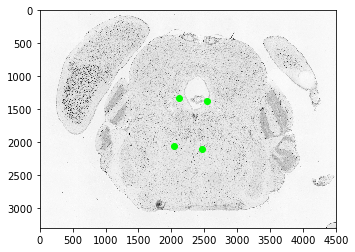

In [18]:
for c in range(0, len(image_id_list)):
    print(image_id_list[c])
    print(xy_list[c])

    p = [(L/(downSample+1), U/(downSample+1)), 
         (R/(downSample+1), U/(downSample+1)),
         (L/(downSample+1), D/(downSample+1)), 
         (R/(downSample+1), D/(downSample+1))]
     
    plotWithPoints(xy_list[c], image_id_list[c])

## Get the x,y,z (now true anatomical coordinates) of the corresponding point in the reference atlas.

In [ ]:
zeroImageToReference_xyz=reference_equiv['msg']['image_to_reference']
print (zeroImageToReference_xyz)
print(zeroImageToReference_xyz['x'])

## Get the sections number and coordinates within each image set of each Gene that best matches with the x,y,z coordinate of the reference atlas



In [ ]:
matchingJson={}

for gene in genes:
    print(gene)
    for c in range(0,pir_from_ecallen.shape[1]-1):
        print(pir_from_ecallen[0,c], pir_from_ecallen[1,c], pir_from_ecallen[2,c])
        
        
        
    urlString=''.join(['http://api.brain-map.org/api/v2/reference_to_image/10.json?',
                        'x=',
                        str(round(zeroImageToReference_xyz['x'])),
                        '&y=',
                        str(round(zeroImageToReference_xyz['y'])),
                        '&z=',
                        str(round(zeroImageToReference_xyz['z'])),
                        "&section_data_set_ids=",
                        str(imageDataSet_ids[gene])])
 #   print(urlString)
    response = requests.get(urlString)
    rJson=response.json()
    matchingJson[gene]=rJson
#    print(rJson)
    print()
    print(gene)
#    print(rJson['msg'][0]['image_sync'])
    print(rJson['msg'][0]['image_sync']['section_number'])
    print(rJson['msg'][0]['image_sync']['section_image_id'])
    print(rJson['msg'][0]['image_sync']['x'])
    print(rJson['msg'][0]['image_sync']['y'])








In [ ]:
matchingJson={}

for gene in genes:
    urlString=''.join(['http://api.brain-map.org/api/v2/reference_to_image/10.json?',
                        'x=',
                        str(round(zeroImageToReference_xyz['x'])),
                        '&y=',
                        str(round(zeroImageToReference_xyz['y'])),
                        '&z=',
                        str(round(zeroImageToReference_xyz['z'])),
                        "&section_data_set_ids=",
                        str(imageDataSet_ids[gene])])
 #   print(urlString)
    response = requests.get(urlString)
    rJson=response.json()
    matchingJson[gene]=rJson
#    print(rJson)
    print()
    print(gene)
#    print(rJson['msg'][0]['image_sync'])
    print(rJson['msg'][0]['image_sync']['section_number'])
    print(rJson['msg'][0]['image_sync']['section_image_id'])
    print(rJson['msg'][0]['image_sync']['x'])
    print(rJson['msg'][0]['image_sync']['y'])







In [ ]:
matchingImages={}
for gene in genes:
    matchID=matchingJson[gene]['msg'][0]['image_sync']['section_image_id']
    print(gene, matchID)
    matchingImages[gene]=getImage(matchID, 3, 1)
    print(matchingImages[gene].shape)
    print()

In [ ]:
response = requests.get("http://api.brain-map.org/api/v2/structure_graph_download/1.json")

In [ ]:
for gene in genes:
    if imageDataSet_ids[gene]>0:
        build_string=''.join(['http://api.brain-map.org/api/v2/data/',
                      'query.json?criteria=model::SectionDataSet,',
                      'rma::criteria,',
                      "[failed$eq'false'],",
                      "products[abbreviation$eq'Mouse'],",
                      "plane_of_section[name$eq'",
                      section_orientation,
                      "'],",
                      "genes[acronym$eq'",
                        gene,
                        "']"])
        print(build_string)
        response = requests.get(build_string)
        rJson=response.json()
        imageDataSet_ids[gene]=rJson['msg'][0]['specimen_id']


response = requests.get("http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,[failed$eq'false'],products[abbreviation$eq'Mouse'],plane_of_section[name$eq'sagittal'],genes[acronym$eq'Adora2a']")


In [ ]:
jj=response.json();
jj['msg'][0]['specimen_id']


In [ ]:
''.join(['a', str(3)])

In [ ]:
for gene in genes:
    if imageDataSet_ids[gene]>0:
        newName=''.join([str(imageDataSet_ids[gene]), '.zip'])
        print(newName)
        build_string=''.join(['http://api.brain-map.org/',
                    'grid_data/download/',
                    str(imageDataSet_ids[gene]),
                    '?include=energy'])
        req=requests.get(build_string, stream=True)
        req.raise_for_status()
        with open(newName, 'wb') as fd:
            for chunk in req.iter_content(chunk_size=50000):
#                    print('Received a Chunk')
                fd.write(chunk)

In [ ]:
import zipfile
pp=zipfile.ZipFile('test.zip')
print("try")
pp.namelist()
rrr=pp.read('energy.raw')
#pp.extractall()


In [ ]:
import sys 
sys.getsizeof(rrr)

In [ ]:
print(req.headers)



In [ ]:
print(req.encoding)


# Different approach
Start with the csv file from KW
Read it in and store the informaiton in geneData
The first 6 columns are the ones from KW.  The 7th is the imageSetID for that gene coronal data

In [ ]:
import csv

with open('cm.csv', newline='') as myFile:  
    reader = csv.reader(myFile)
    rownum=0
    for row in reader:
        if rownum==0:
            geneData=[row+['id']]
            rownum=1;
        else:
            gene=row[0]
            id=getGeneID(gene)
            if id==0:
                print('for gene', gene, 'there is no coronal data.  Skipping')
            else:
                print('for gene', gene, 'coronal data has id', str(id))
                geneData=geneData+[row+[id]]
                rownum=rownum+1
        


In [ ]:
len(geneData)

In [ ]:
import zipfile
import os

for rNum in range(1,len(geneData)-1):
    row=geneData[rNum]
    id=str(row[6])
    print(rNum, ':', row[0], row[6])
    newName=''.join([id, '.zip'])
    build_string=''.join(['http://api.brain-map.org/',
                'grid_data/download/',
                id,
                '?include=energy'])
    
    req=requests.get(build_string, stream=True)
    req.raise_for_status()
    with open(newName, 'wb') as fd:
        for chunk in req.iter_content(chunk_size=50000):
            fd.write(chunk)
            
    geneZip=zipfile.ZipFile(newName)
    geneZip.extractall(None, ['energy.raw'])
    os.rename('energy.raw', ''.join(['e', id, '.raw']))    

    

In [ ]:
with open('lmOut.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for rNum in range(1,len(geneData)-1):
        row=geneData[rNum]
        spamwriter.writerow(row)


In [ ]:
print(id)
aaa=np.fromfile('e79591401.raw')
aaa.shape
sys.byteorder

In [ ]:
aaa.shape